In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
df=pd.read_csv("/Users/sergio/Desktop/IRONHACK/Weeks 5 to 9/Week 05/lab01/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
df.head() #retrieve first few rows
df.shape #retrieve structure of df
df.dtypes #retrieve data types 

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

Data Cleaning: 

In [119]:
#Data cleaning: 
#check missing data
df.isnull().sum().sort_values(ascending=False)
df.columns[df.isnull().mean() > 0.8]


Index([], dtype='object')

In [34]:
#1: Understanding Product Categories: 
#Frequenct tables: generate a table for the product category

dfcat=df['category'].value_counts()
proportion_table = df['category'].value_counts(normalize=True)*100
print('Frequency table for product category')
print(dfcat)
print("____________")
print("Top most listed product categories: ")
proportion_table.head(5)


Frequency table for product category
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64
____________
Top most listed product categories: 


category
Sports & Outdoors                         34.221949
Beauty                                     0.790293
Handmade Clothing, Shoes & Accessories     0.786896
Bath & Body                                0.781290
Birthday Gifts                             0.776625
Name: proportion, dtype: float64

In [81]:
#1: top 5 categories filtered

dfcat_top5=df['category'].value_counts().head(5)
dfcattop5=df['category'].sort_values(ascending=False).head(5)
dfcat_top5


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

- Insights: Top 5 listed categories: Sports & Outdoors, Beauty, Handmade clothing shoes accesories, bath & body, byrthday & gifts

In [54]:
#2: Visualizations
#create s crosstab table
my_table=pd.crosstab(index=df['category'], 
                             columns='counts')
my_table
#get top 5
top5ct=my_table.sort_values('counts', ascending=False).head(5)
top5ct


col_0,counts
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


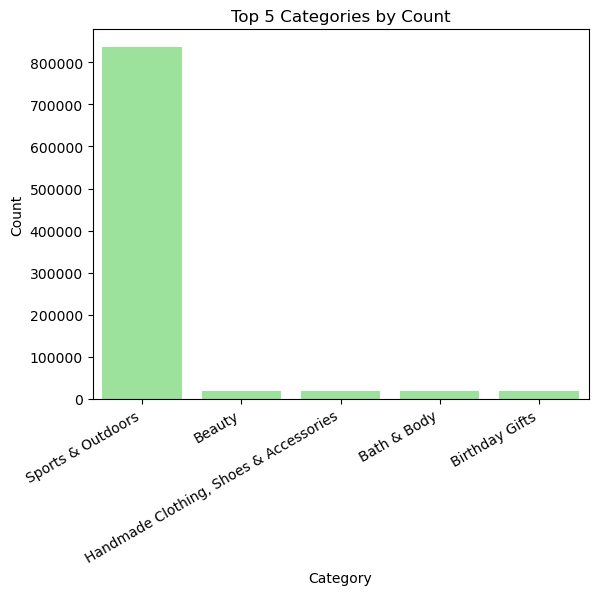

In [ ]:
sns.barplot(x=top5ct.index, y=top5cat['counts'], color='lightgreen');
plt.xticks(rotation=30, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Categories by Count')

Text(0, 0.5, '')

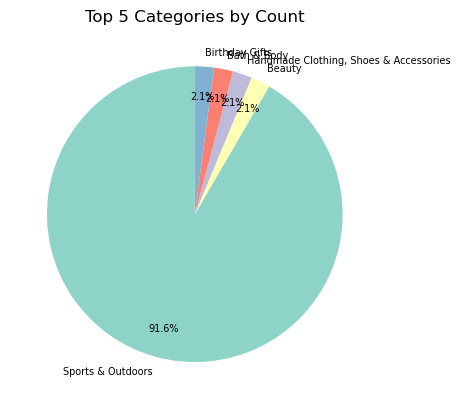

In [90]:
dfcat_top5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), labels=dfcat_top5.index,textprops={
    'fontsize': 7, 'color': 'black'}, pctdistance=0.8, labeldistance=1.1)
plt.title('Top 5 Categories by Count')
plt.ylabel('')


In [ ]:
#Part 2: Delving into product pricing: How are products priced on Amazon UK? are there specific price points or ranges that are more common? 
#1. Measures of centrality: 
##calculate the mean, median and mode for the price of products 

#1 Summary statistics
df.describe()
#2 centrality measures
print(df['price'].mode())
print(df['price'].median())
print(df['price'].mean())

0    9.99
Name: price, dtype: float64
19.09
89.24380943923663


Measures of centrality for price:

- Mean: 89.24.
- Mode: 9.99
- Median: 19.09

- the average price of products listed is 89.24. In comparison with the mode (9.99) the average is significantly higher almost 10x. This tells us that there 9.99 is the most common price but still, considering all the products the average is higher despite that fact. 

In [107]:
#2. Measures  of dispersion: 
## 2.1 determine the variance, std deviation, range and intrrquartile range for product price

print('Measures of Dispersion: ')
print('')
print('Variance :')
print(df['price'].var())
print('')
print('Standar Dev :')
print(df['price'].std())
print('')
print('Max value :')
print(df['price'].max())
print('')
print('Min value :')
print(df['price'].min())
print('')
print('Interquartile range :')
print(df['price'].quantile([0.25, 0.5, 0.75]))


Measures of Dispersion: 

Variance :
119445.48532256528

Standar Dev :
345.60886175352226

Max value :
100000.0

Min value :
0.0

Interquartile range :
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


2.2: 

- The prices are very varied. High variance, high std deviation, the range is wide, the mean is far away from the max value. It seems 50% of products are priced below 19.09, and the higher end of the quartiles appear to be more spreaded, more variance in the top direction. 

<Axes: xlabel='price', ylabel='Count'>

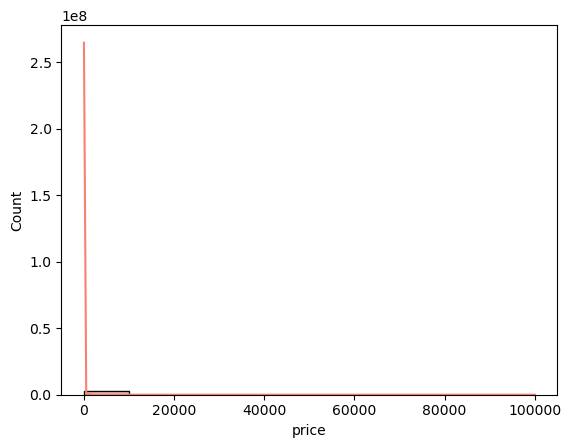

In [111]:
#Plot a histogram: 
sns.histplot(df['price'], kde=True, bins=10, color="salmon")

- The histogram shows that most of the products are near the lower end of the spectrum. With very large outliers skewed to the right. This could be fixed by zooming in where most of the prices are, or bt somehow filtering the data to remove outliers, and see a more understandable distribution. 

<Axes: ylabel='price'>

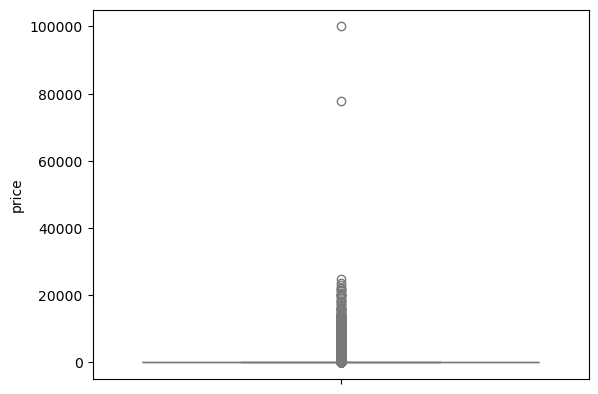

In [113]:
#boxplot ->showcase the spread and potential outliers in product pricing: 
sns.boxplot(data=df['price'], color="lightblue")


- Observing the boxplot, we  can see that the price distribution is highly skewed to the right. 50% of product prices are heavily concentraded in a narrow, near to the bottom, price range. We can see that, from the median point upwards, the prices begin to have a higher variance while having a fewer frequency. We also find two extreme outliers, with prices orders of magnitude higher than the majority of the product prices from the dataset. 

In [ ]:
#Part 3: Unpacking product ratings: how do customers rate products on amazon uk. Are there any patterns or tendencies? 

#3.1 : Measures of centrality: Calculate mean median and mode for rating of products. Describe the trend
df.head()
print('Centrality measures of products rating: ')
print('Median :')
print(df['stars'].median())
print('')
print('Mean :')
print(df['stars'].mean())
print('')
print('Mode :')
print(df['stars'].mode())


Centrality measures of products rating: 
Median :
0.0

Mean :
2.152836472966065

Mode :
0    0.0
Name: stars, dtype: float64


In [125]:
#filter out products with rating = 0. I assume products with rating 0 have not yet been ranked by users. 
df['stars'].value_counts()
df_nonzero=df[df['stars']!=0]


In [132]:
df_nonzero['stars'].value_counts().sort_values(ascending=False)

stars
4.5    151577
4.6    136995
4.4    136165
5.0    128492
4.3    112564
4.7     94566
4.2     86871
4.0     66089
4.1     65115
4.8     41858
3.9     36555
3.8     27876
3.7     21137
3.6     16219
3.5     14673
3.0     12819
4.9     11081
3.4     10355
1.0      8484
3.3      8269
3.2      5771
3.1      4679
2.0      3901
2.9      3341
2.8      2306
2.7      2104
2.5      2103
2.6      1579
2.4      1060
2.3       734
2.2       602
2.1       540
1.5       404
1.9       300
1.8       249
1.7       177
1.4       149
1.6       147
1.3        78
1.2        23
1.1         3
Name: count, dtype: int64

In [127]:
df_nonzero['stars'].value_counts()

print('Centrality measures of product ratings:')
print('--------------------------------------')

print('Median :', df_nonzero['stars'].median())
print('Mean   :', df_nonzero['stars'].mean())
print('Mode   :', df_nonzero['stars'].mode()[0])

Centrality measures of product ratings:
--------------------------------------
Median : 4.4
Mean   : 4.31916076222691
Mode   : 4.5


If i take out the products that have 0 as rating, we can see that most products are rated around 4.3. The most common rating is 4.5, and the median rating is 4.4, The tendency is clear, customers tend to rate amazon UK product with high ratings around 4.3

In [135]:
#3.2 Measures of dispersion: Determine the variance, std, and interquartile range for product rating

var_rating= df_nonzero['stars'].var()
std_rating=df_nonzero['stars'].std()
min_rating=df_nonzero['stars'].min()
max_rating=df_nonzero['stars'].max()
quantiles_rating=df_nonzero['stars'].quantile([0.25,0.5,0.75])

print('Measures of dispersion for ratings: ')
print('-------------------------------------')

print('variance :', var_rating)
print('std_rating :', std_rating)
print('min rating :', min_rating)
print('max rating :', max_rating)

print('quantiles :')
print(quantiles_rating)


Measures of dispersion for ratings: 
-------------------------------------
variance : 0.3083433752380519
std_rating : 0.5552867504614637
min rating : 1.0
max rating : 5.0
quantiles :
0.25    4.1
0.50    4.4
0.75    4.6
Name: stars, dtype: float64


After removing the products with 0 rating, first we can see that most of the ratings are concentrated between 4 and 5. with most of the records around 4.4. For the same reason, ratings have a small standard deviation, despite having a range of 4 points from 1 to 5 in the ratings

In [137]:
#3.3: Shape of the distribution : calculate the skweness and kurtosis for rating

skewness_rating=df_nonzero['stars'].skew()
kurtosis_rating=df_nonzero['stars'].kurtosis()
skewness_rating, kurtosis_rating

(np.float64(-2.3795681122127945), np.float64(9.78193769066435))

In [ ]:
# Skewness= -2.38; Kurtosis= 9.78
#ratings are strongly skewed to the left, with smaller rating values acting as outliers while the majority of the ratings sit at the top of the range. Users tend to rate positively
#Very high kurtosis. ratings are leptokurtic, more peaked and heavy tail to the left. Most products rated close to the mean, while having a significant amount of products still rated very low, acting as outliers. These factors lead to a high kurtosis in this case. 

<Axes: xlabel='stars', ylabel='Count'>

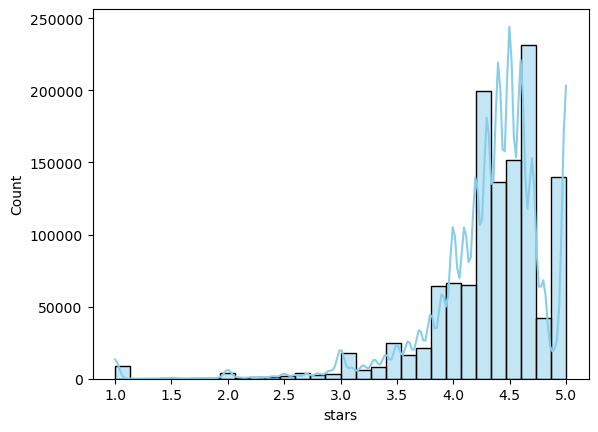

In [140]:
#Visualization: Plot a histogram to visualize the distirbution of product ratings. Is there a specific rating thats more common? 

sns.histplot(df_nonzero['stars'], kde=True, bins=30, color="skyblue")


In [ ]:
#The histogram reveals that most values are concentrated around 4.3-4.6 approximately. This is where most of the rating values lie. 
# It confirms the skweness and kurtosis calculations, we see high and sharp peak, while having a long skewed tail to the left, having an important quantity of ratings situated betweem 1 (extremely low) and 3.
# rating of 4.5 appears to be the most common. 